# Data collection

In [1]:
# Imports
import requests
import zipfile
import os
import pandas as pd
import ftplib
import os
from getpass import getpass
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## STEP 1: Collect data

AIS and CMEMS data for the model on:

* 01.01.2020
* 01.04.2020
* 01.07.2020
* 01.10.2020

CMEMS data for the routing on:
* 01.06.2021
* 02.06.2021
* 03.06.2021

### Model data - AIS

In [2]:

# Download data

# Set file path
urls = ['https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_01_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_04_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_07_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_10_01.zip']

# Unzip data
for url in urls:

  r = requests.get(url)
  filename = url.split('/')[-1]
  with open(filename,'wb') as output_file:
      output_file.write(r.content)
  print(filename)

  try:
      with zipfile.ZipFile(filename) as z:
          z.extractall()
          print("Extracted file")
          os.remove(filename)
  except:
      print("Invalid file")

print("Download completed!")

'\n# Download data\n\n# Set file path\nurls = [\'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_01_01.zip\',\n\'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_04_01.zip\',\n\'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_07_01.zip\',\n\'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_10_01.zip\']\n\n# Unzip data\nfor url in urls:\n\n  r = requests.get(url)\n  filename = url.split(\'/\')[-1]\n  with open(filename,\'wb\') as output_file:\n      output_file.write(r.content)\n  print(filename)\n\n  try:\n      with zipfile.ZipFile(filename) as z:\n          z.extractall()\n          print("Extracted file")\n          os.remove(filename)\n  except:\n      print("Invalid file")\n\nprint("Download completed!")\n'

In [3]:

# Download data

# Set file path
urls = ['https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_01_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_04_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_07_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_10_01.zip']

# Unzip data
for url in urls:

  r = requests.get(url)
  filename = url.split('/')[-1]
  with open(filename,'wb') as output_file:
      output_file.write(r.content)
  print(filename)

  try:
      with zipfile.ZipFile(filename) as z:
          z.extractall()
          print("Extracted file")
          os.remove(filename)
  except:
      print("Invalid file")

print("Download completed!")


'\n# Read csv and create df\nais_data = pd.DataFrame()\n\nfor url in urls:\n\n  filename = url.split(\'/\')[-1]\n  filename = filename.replace("zip", "csv")\n  data = pd.read_csv(\'data/\' + filename)\n  ais_data = ais_data.append(data)\n  \nprint("Before preprocessing...")\nais_data = ais_data.reset_index(drop = True)\nais_data\n'

In [4]:

# Save AIS data to file
ais_data.to_csv('data/ais_data_all.csv')


"\n# Save AIS data to file\nais_data.to_csv('data/ais_data_all.csv')\n"

### Model data - CMEMS
Downloading the data for the 4 days. [DATASETS](https://resources.marine.copernicus.eu/?option=com_csw&task=results)

In [ ]:

# Connect to CMEMS FTP

# name = 'avilanovacortez'
# pwd = 'CMEMS-data-2021'

name = getpass('Enter name: ')
pwd = getpass('Enter pwd: ')


def make_con(url):

    con = ftplib.FTP(url)
    print(con.getwelcome())

    return con

con = make_con('nrt.cmems-du.eu')


In [6]:

# Print available data

wav_url = '/Core/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/global-analysis-forecast-wav-001-027/2020/' # 3-hourly
phy_url = '/Core/GLOBAL_ANALYSIS_FORECAST_PHY_001_024/global-analysis-forecast-phy-001-024/2020/' # 24-hourly

def print_collection(url, con):

  try:

    con.login(name, pwd)
    # Navigate to a wave forecast product
    con.cwd(url)
    # Retrieve as list
    con.retrlines('LIST') 
    
  except ftplib.all_errors as e:
    print('FTP error:', e)

#print_collection(wav_url + '07', con) # Print content for July
"""

"\n# Print available data\n\nwav_url = '/Core/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/global-analysis-forecast-wav-001-027/2020/' # 3-hourly\nphy_url = '/Core/GLOBAL_ANALYSIS_FORECAST_PHY_001_024/global-analysis-forecast-phy-001-024/2020/' # 24-hourly\n\ndef print_collection(url, con):\n\n  try:\n\n    con.login(name, pwd)\n    # Navigate to a wave forecast product\n    con.cwd(url)\n    # Retrieve as list\n    con.retrlines('LIST') \n    \n  except ftplib.all_errors as e:\n    print('FTP error:', e)\n\n#print_collection(wav_url + '07', con) # Print content for July\n"

In [7]:


# Download data 

wav_url = '/Core/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/global-analysis-forecast-wav-001-027/2020/' # 3-hourly
phy_url = '/Core/GLOBAL_ANALYSIS_FORECAST_PHY_001_024/global-analysis-forecast-phy-001-024/2020/' # 24-hourly

wav_jan = "mfwamglocep_2020010100_R20200102.nc"
wav_apr = "mfwamglocep_2020040100_R20200402.nc"
wav_jul = "mfwamglocep_2020070100_R20200702.nc"
wav_oct = "mfwamglocep_2020100100_R20201002.nc"

phy_jan = "mercatorpsy4v3r1_gl12_mean_20200101_R20200115.nc"
phy_apr = "mercatorpsy4v3r1_gl12_mean_20200401_R20200415.nc"
phy_jul = "mercatorpsy4v3r1_gl12_mean_20200701_R20200715.nc"
phy_oct = "mercatorpsy4v3r1_gl12_mean_20201001_R20201014.nc"

def download_ftp(url, prod_name):
  # Check if file exists, taken from source at the top
  if os.path.isfile(prod_name):
    print("There is already a local copy of {}".format(prod_name))

  else:
    try:

      con.login(name, pwd)
      con.cwd(url)

      with open(prod_name, 'wb') as fp:
        con.retrbinary('RETR {}'.format(prod_name), fp.write)
            
    except ftplib.all_errors as e:
      print('FTP error:', e)

# Use this to download data 
download_ftp(wav_url + '01', wav_jan)
download_ftp(wav_url + '04', wav_apr)
download_ftp(wav_url + '07', wav_jul)
download_ftp(wav_url + '10', wav_oct)

download_ftp(phy_url + '01', phy_jan)
download_ftp(phy_url + '04', phy_apr)
download_ftp(phy_url + '07', phy_jul)
download_ftp(phy_url + '10', phy_oct)

'\n# Download data \n\nwav_url = \'/Core/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/global-analysis-forecast-wav-001-027/2020/\' # 3-hourly\nphy_url = \'/Core/GLOBAL_ANALYSIS_FORECAST_PHY_001_024/global-analysis-forecast-phy-001-024/2020/\' # 24-hourly\n\nwav_jan = "mfwamglocep_2020010100_R20200102.nc"\nwav_apr = "mfwamglocep_2020040100_R20200402.nc"\nwav_jul = "mfwamglocep_2020070100_R20200702.nc"\nwav_oct = "mfwamglocep_2020100100_R20201002.nc"\n\nphy_jan = "mercatorpsy4v3r1_gl12_mean_20200101_R20200115.nc"\nphy_apr = "mercatorpsy4v3r1_gl12_mean_20200401_R20200415.nc"\nphy_jul = "mercatorpsy4v3r1_gl12_mean_20200701_R20200715.nc"\nphy_oct = "mercatorpsy4v3r1_gl12_mean_20201001_R20201014.nc"\n\ndef download_ftp(url, prod_name):\n  # Check if file exists, taken from source at the top\n  if os.path.isfile(prod_name):\n    print("There is already a local copy of {}".format(prod_name))\n\n  else:\n    try:\n\n      con.login(name, pwd)\n      con.cwd(url)\n\n      with open(prod_name, \'wb\') as

In [8]:

# OPTIONAL: Reduce CMEMS waves data size by using bbox

# Between Rio de Janeiro and Lisboa
bbox = ((-9, 22), (-46, 38))

def get_closest(array, value):
    return np.abs(array - value).argmin()
    
ds_wav_jan = xr.open_dataset('data/' + wav_jan)
ds_wav_apr = xr.open_dataset('data/' + wav_apr)
ds_wav_jul = xr.open_dataset('data/' + wav_jul)
ds_wav_oct = xr.open_dataset('data/' + wav_oct)

ds_wav_all = [ds_wav_jan, ds_wav_apr, ds_wav_jul, ds_wav_oct]

datasets_wav = []

for ds_month in ds_wav_all:
  
  lon_min = get_closest(ds_month.longitude.data, bbox[0][0])
  lon_max = get_closest(ds_month.longitude.data, bbox[1][0])
  lat_min = get_closest(ds_month.latitude.data, bbox[0][1])
  lat_max = get_closest(ds_month.latitude.data, bbox[1][1])

  ds_wav_month_reg = ds_month.isel(time = 0, longitude = slice(lon_min, lon_max), latitude = slice(lat_min, lat_max))
  datasets_wav.append(ds_wav_month_reg)

ds_wav = xr.concat(datasets_wav, dim = 'time')
ds_wav


"\n# OPTIONAL: Reduce CMEMS waves data size by using bbox\n\n# Between Rio de Janeiro and Lisboa\n# bbox = ((-9, 22), (-46, 38))\n\ndef get_closest(array, value):\n    return np.abs(array - value).argmin()\n    \nds_wav_jan = xr.open_dataset('data/' + wav_jan)\nds_wav_apr = xr.open_dataset('data/' + wav_apr)\nds_wav_jul = xr.open_dataset('data/' + wav_jul)\nds_wav_oct = xr.open_dataset('data/' + wav_oct)\n\nds_wav_all = [ds_wav_jan, ds_wav_apr, ds_wav_jul, ds_wav_oct]\n\ndatasets_wav = []\n\nfor ds_month in ds_wav_all:\n  \n  lon_min = get_closest(ds_month.longitude.data, bbox[0][0])\n  lon_max = get_closest(ds_month.longitude.data, bbox[1][0])\n  lat_min = get_closest(ds_month.latitude.data, bbox[0][1])\n  lat_max = get_closest(ds_month.latitude.data, bbox[1][1])\n\n  ds_wav_month_reg = ds_month.isel(time = 0, longitude = slice(lon_min, lon_max), latitude = slice(lat_min, lat_max))\n  datasets_wav.append(ds_wav_month_reg)\n\nds_wav = xr.concat(datasets_wav, dim = 'time')\nds_wav\n"

In [9]:

# OPTIONAL: Reduce CMEMS physics data size by using bbox

ds_phy_jan = xr.open_dataset('data/' + phy_jan)
ds_phy_apr = xr.open_dataset('data/' + phy_apr)
ds_phy_jul = xr.open_dataset('data/' + phy_jul)
ds_phy_oct = xr.open_dataset('data/' + phy_oct)

ds_phy_all = [ds_phy_jan, ds_phy_apr, ds_phy_jul, ds_phy_oct]

datasets_phy = []

for ds_month in ds_phy_all:
  
  lon_min = get_closest(ds_month.longitude.data, bbox[0][0])
  lon_max = get_closest(ds_month.longitude.data, bbox[1][0])
  lat_min = get_closest(ds_month.latitude.data, bbox[0][1])
  lat_max = get_closest(ds_month.latitude.data, bbox[1][1])

  ds_phy_month_reg = ds_month.isel(time = 0, longitude = slice(lon_min, lon_max), latitude = slice(lat_min, lat_max))
  datasets_phy.append(ds_phy_month_reg)

ds_phy = xr.concat(datasets_phy, dim = 'time')
ds_phy

"\n# OPTIONAL: Reduce CMEMS physics data size by using bbox\n\nds_phy_jan = xr.open_dataset('data/' + phy_jan)\nds_phy_apr = xr.open_dataset('data/' + phy_apr)\nds_phy_jul = xr.open_dataset('data/' + phy_jul)\nds_phy_oct = xr.open_dataset('data/' + phy_oct)\n\nds_phy_all = [ds_phy_jan, ds_phy_apr, ds_phy_jul, ds_phy_oct]\n\ndatasets_phy = []\n\nfor ds_month in ds_phy_all:\n  \n  lon_min = get_closest(ds_month.longitude.data, bbox[0][0])\n  lon_max = get_closest(ds_month.longitude.data, bbox[1][0])\n  lat_min = get_closest(ds_month.latitude.data, bbox[0][1])\n  lat_max = get_closest(ds_month.latitude.data, bbox[1][1])\n\n  ds_phy_month_reg = ds_month.isel(time = 0, longitude = slice(lon_min, lon_max), latitude = slice(lat_min, lat_max))\n  datasets_phy.append(ds_phy_month_reg)\n\nds_phy = xr.concat(datasets_phy, dim = 'time')\nds_phy\n"

In [10]:
# Join all wave products by using open_mfdataset, chunking data in response to memory issues
ds_wav_all = xr.open_mfdataset('data/mfwamglocep*.nc')
ds_wav_all

<xarray.Dataset>
Dimensions:    (latitude: 2041, longitude: 4320, time: 32)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2020-01-01T03:00:00 ... 2020-10-02
Data variables: (12/17)
    VHM0       (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    VMDR_WW    (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    VHM0_WW    (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    VMDR_SW1   (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    VTM01_SW1  (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    VMDR_SW2   (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    ...         ...
    VTPK       (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    VSDX       (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    VSDY       (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    VPED       (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    VTM02      (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    VTM01_WW   (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
Attributes: (12/27)
    Conventions:                   CF-1.6
    time_coverage_start:           20200101-03:00:00
    time_coverage_end:             20200102-00:00:00
    date_created:                  20200102-06:22:00
    product_type:                  hindcast
    product:                       GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    ...                            ...
    geospatial_lon_step:           0.08332825
    geospatial_lon_units:          degree
    geospatial_lat_min:            -80.0
    geospatial_lat_max:            90.0
    geospatial_lat_step:           0.08333588
    geospatial_lat_units:          degree

In [11]:
ds_phy_all = xr.open_mfdataset('data/mercator*.nc')
ds_phy_all

<xarray.Dataset>
Dimensions:    (depth: 50, latitude: 2041, longitude: 4320, time: 4)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 2020-01-01T12:00:00 ... 2020-10-01T12:00:00
Data variables:
    mlotst     (time, latitude, longitude) float32 dask.array<chunksize=(1, 2041, 4320), meta=np.ndarray>
    zos        (time, latitude, longitude) float32 dask.array<chunksize=(1, 2041, 4320), meta=np.ndarray>
    bottomT    (time, latitude, longitude) float32 dask.array<chunksize=(1, 2041, 4320), meta=np.ndarray>
    sithick    (time, latitude, longitude) float32 dask.array<chunksize=(1, 2041, 4320), meta=np.ndarray>
    siconc     (time, latitude, longitude) float32 dask.array<chunksize=(1, 2041, 4320), meta=np.ndarray>
    usi        (time, latitude, longitude) float32 dask.array<chunksize=(1, 2041, 4320), meta=np.ndarray>
    vsi        (time, latitude, longitude) float32 dask.array<chunksize=(1, 2041, 4320), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 2041, 4320), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 2041, 4320), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 2041, 4320), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 2041, 4320), meta=np.ndarray>
Attributes: (12/24)
    title:              daily mean fields from Global Ocean Physics Analysis ...
    easting:            longitude
    northing:           latitude
    history:            2020/01/12 21:22:06 MERCATOR OCEAN Netcdf creation
    source:             MERCATOR PSY4V3R1
    institution:        MERCATOR OCEAN
    ...                 ...
    longitude_min:      -180.0
    longitude_max:      179.91667
    latitude_min:       -80.0
    latitude_max:       90.0
    z_min:              0.494025
    z_max:              5727.917

### Routing data - CMEMS

In [12]:

# Print available data
wav_url = '/Core/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/global-analysis-forecast-wav-001-027/2021/' 
phy_url = '/Core/GLOBAL_ANALYSIS_FORECAST_PHY_001_024/global-analysis-forecast-phy-001-024/2021/' 

def print_collection(url, con):

  try:
   
    con.login(name, pwd)
    con.cwd(url)
    con.retrlines('LIST') 
    
  except ftplib.all_errors as e:
    print('FTP error:', e)

print_collection(wav_url + '06', con)

"\n# Print available data\nwav_url = '/Core/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/global-analysis-forecast-wav-001-027/2021/' \nphy_url = '/Core/GLOBAL_ANALYSIS_FORECAST_PHY_001_024/global-analysis-forecast-phy-001-024/2021/' \n\ndef print_collection(url, con):\n\n  try:\n   \n    con.login(name, pwd)\n    con.cwd(url)\n    con.retrlines('LIST') \n    \n  except ftplib.all_errors as e:\n    print('FTP error:', e)\n\nprint_collection(wav_url + '06', con)\n"

In [13]:

wav_2021_06_01 = "mfwamglocep_2021060100_R20210602.nc"
wav_2021_06_02 = "mfwamglocep_2021060200_R20210603.nc"
wav_2021_06_03 = "mfwamglocep_2021060300_R20210604.nc"

phy_2021_06_01 = "mercatorpsy4v3r1_gl12_mean_20210601_R20210609.nc"
phy_2021_06_02 = "mercatorpsy4v3r1_gl12_mean_20210602_R20210616.nc"
phy_2021_06_03 = "mercatorpsy4v3r1_gl12_mean_20210603_R20210616.nc"

download_ftp(wav_url + '06', wav_2021_06_01)
download_ftp(wav_url + '06', wav_2021_06_02)
download_ftp(wav_url + '06', wav_2021_06_03)

download_ftp(phy_url + '06', phy_2021_06_01)
download_ftp(phy_url + '06', phy_2021_06_02)
download_ftp(phy_url + '06', phy_2021_06_03)

'\nwav_2021_06_01 = "mfwamglocep_2021060100_R20210602.nc"\nwav_2021_06_02 = "mfwamglocep_2021060200_R20210603.nc"\nwav_2021_06_03 = "mfwamglocep_2021060300_R20210604.nc"\n\nphy_2021_06_01 = "mercatorpsy4v3r1_gl12_mean_20210601_R20210609.nc"\nphy_2021_06_02 = "mercatorpsy4v3r1_gl12_mean_20210602_R20210616.nc"\nphy_2021_06_03 = "mercatorpsy4v3r1_gl12_mean_20210603_R20210616.nc"\n\ndownload_ftp(wav_url + \'06\', wav_2021_06_01)\ndownload_ftp(wav_url + \'06\', wav_2021_06_02)\ndownload_ftp(wav_url + \'06\', wav_2021_06_03)\n\ndownload_ftp(phy_url + \'06\', phy_2021_06_01)\ndownload_ftp(phy_url + \'06\', phy_2021_06_02)\ndownload_ftp(phy_url + \'06\', phy_2021_06_03)\n'

## STEP 2: Merge and preprocess model data
In general:
* Merge AIS data with CMEMS data
* Remove unneccessary columns (show estimated time, latitude, longitude, heading, SOG, COG, Gross Tonage, VHM0, VMDR, VTPK, Temperature, Salinity and Thickness)

For all data:
* Remove ships with Status =! 0 or Status =! 8
* Remove ships with SOG < 7 or SOG > 102.2
* Remove ships with latitude > 91 and longitude > 181
* Remove ships with latitude < -91 and longitude < -181
* Remove ships with heading > 361
* Round data base times
* Normalize all data to remove outliers
* Standardize between 0 and 1

In [14]:
study_data = pd.read_csv('data/ais_data_all.csv')

In [15]:
# Remove ships with status =! 0 and status =! 8
study_data = study_data[(study_data['Status'] == 0) | (study_data['Status'] == 8)].dropna()

# Remove ships with SOG < 5 or SOG > 102.2
study_data = study_data[(study_data['SOG'] > 7) & (study_data['SOG'] < 102.2)].dropna()

# Remove ships with latitude > 91 and longitude > 181
study_data = study_data[(study_data['LAT'] < 91) & (study_data['LAT'] > -91)].dropna()
study_data = study_data[(study_data['LON'] < 181) & (study_data['LON'] > -181)].dropna()

# Remove ships with heading > 361
study_data = study_data[(study_data['Heading'] < 361)].dropna()

# Calculate tonnage (Length * Breadth * Depth * S) - WE DON'T HAVE THE DEPTH
# According to https://cdn.shopify.com/s/files/1/1021/8837/files/Tonnage_Guide_1_-_Simplified_Measurement.pdf?1513
study_data['GrossTonnage'] = 0.67 * study_data['Length'] * study_data['Width']

study_data = study_data.reset_index(drop=True)
study_data

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass,GrossTonnage
0,9,477628100,2020-01-01T00:00:01,36.80096,-75.22302,12.8,-128.7,283.0,NINGBO SEAL,IMO9579066,VRJD3,70.0,0.0,225.0,32.0,14.3,70.0,B,4824.00
1,17,538002845,2020-01-01T00:00:10,26.08420,-79.48273,13.2,189.0,187.0,YASA GOLDEN DARDANEL,IMO9339985,V7ME9,80.0,0.0,245.0,42.0,15.0,89.0,B,6894.30
2,50,249974000,2020-01-01T00:00:06,29.34368,-94.74366,10.2,85.7,86.0,PTI RHINE,IMO9313462,9HA4456,80.0,0.0,183.0,32.0,13.2,81.0,B,3923.52
3,55,477542400,2020-01-01T00:00:01,37.76973,-122.35415,10.6,-87.5,326.0,ATLANTIC PISCES,IMO9392781,VRFN3,80.0,0.0,183.0,32.0,12.2,80.0,B,3923.52
4,69,636016431,2020-01-01T00:00:10,26.89363,-79.20262,19.7,154.9,155.0,MSC VAISHNAVI R,IMO9227340,A8RL2,70.0,0.0,282.0,32.0,12.5,71.0,B,6046.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544718,22698758,367480260,2020-07-01T23:54:25,47.58564,-87.77563,10.3,91.0,90.0,VICTORY,IMO8003292,WDF7020,31.0,0.0,42.0,13.0,6.3,52.0,B,365.82
544719,22698885,355820000,2020-07-01T23:57:45,37.95802,-123.86718,11.8,158.1,157.0,GLORIOUS HOPE,IMO9648867,3FKB3,70.0,0.0,190.0,32.0,12.7,70.0,B,4073.60
544720,22698919,241376000,2020-07-01T23:57:18,54.39323,-168.56307,10.5,-139.6,269.0,ALPHA WISDOM,IMO9593440,SVCE9,70.0,0.0,229.0,32.0,14.5,70.0,B,4909.76
544721,22698937,367109000,2020-07-01T23:59:15,34.09201,-76.39261,14.1,-183.3,227.0,OVERSEAS HOUSTON,IMO9351062,WWAA,80.0,0.0,183.0,32.0,12.2,80.0,B,3923.52


In [16]:
# Round the base date time
study_data['BaseDateTime'] = study_data['BaseDateTime'].apply(lambda x: datetime.fromisoformat(x))

def datetime_rounder(time):
    return (time.replace(second = 0, minute = 0, hour = time.hour) + timedelta(hours = time.minute//30))

study_data['EstimatedTime'] = [datetime_rounder(study_data['BaseDateTime'][x]) for x in range(study_data['BaseDateTime'].size)]
study_data['EstimatedTime'] = pd.to_datetime(study_data['EstimatedTime']).dt.strftime('%y-%m-%d %h:%I:%s')
#study_data['EstimatedTime'] = [np.datetime64(study_data['EstimatedTime'][x]) for x in range(study_data['EstimatedTime'].size)]

study_data

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass,GrossTonnage,EstimatedTime
0,9,477628100,2020-01-01 00:00:01,36.80096,-75.22302,12.8,-128.7,283.0,NINGBO SEAL,IMO9579066,VRJD3,70.0,0.0,225.0,32.0,14.3,70.0,B,4824.00,2020-01-01 00:00:00
1,17,538002845,2020-01-01 00:00:10,26.08420,-79.48273,13.2,189.0,187.0,YASA GOLDEN DARDANEL,IMO9339985,V7ME9,80.0,0.0,245.0,42.0,15.0,89.0,B,6894.30,2020-01-01 00:00:00
2,50,249974000,2020-01-01 00:00:06,29.34368,-94.74366,10.2,85.7,86.0,PTI RHINE,IMO9313462,9HA4456,80.0,0.0,183.0,32.0,13.2,81.0,B,3923.52,2020-01-01 00:00:00
3,55,477542400,2020-01-01 00:00:01,37.76973,-122.35415,10.6,-87.5,326.0,ATLANTIC PISCES,IMO9392781,VRFN3,80.0,0.0,183.0,32.0,12.2,80.0,B,3923.52,2020-01-01 00:00:00
4,69,636016431,2020-01-01 00:00:10,26.89363,-79.20262,19.7,154.9,155.0,MSC VAISHNAVI R,IMO9227340,A8RL2,70.0,0.0,282.0,32.0,12.5,71.0,B,6046.08,2020-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544718,22698758,367480260,2020-07-01 23:54:25,47.58564,-87.77563,10.3,91.0,90.0,VICTORY,IMO8003292,WDF7020,31.0,0.0,42.0,13.0,6.3,52.0,B,365.82,2020-07-02 00:00:00
544719,22698885,355820000,2020-07-01 23:57:45,37.95802,-123.86718,11.8,158.1,157.0,GLORIOUS HOPE,IMO9648867,3FKB3,70.0,0.0,190.0,32.0,12.7,70.0,B,4073.60,2020-07-02 00:00:00
544720,22698919,241376000,2020-07-01 23:57:18,54.39323,-168.56307,10.5,-139.6,269.0,ALPHA WISDOM,IMO9593440,SVCE9,70.0,0.0,229.0,32.0,14.5,70.0,B,4909.76,2020-07-02 00:00:00
544721,22698937,367109000,2020-07-01 23:59:15,34.09201,-76.39261,14.1,-183.3,227.0,OVERSEAS HOUSTON,IMO9351062,WWAA,80.0,0.0,183.0,32.0,12.2,80.0,B,3923.52,2020-07-02 00:00:00


In [17]:
# Get data for one time
ds_wav = ds_wav_all
ds_phy = ds_phy_all
lat = round(study_data['LAT'].iloc[0])
lon = round(study_data['LON'].iloc[0])
time = str(study_data['EstimatedTime'].iloc[0])

VHM0 = ds_wav.VHM0.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
VMDR = ds_wav.VMDR.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
thetao = ds_phy.thetao.sel(time = time, longitude = lon, latitude = lat, depth = 0, method = 'nearest')
salin = ds_phy.so.sel(time = time, longitude = lon, latitude = lat, depth = 0, method = 'nearest')

In [20]:
# Merge AIS and CMEMS data
study_data = study_data.dropna()

study_data['VHM0'] = 0.0
study_data['VMDR'] = 0.0
study_data['VTPK'] = 0.0
study_data['Temperature'] = 0.0
study_data['Salinity'] = 0.0
study_data['Thickness'] = 0.0

def extract_model():
  
  for index, row in study_data.iterrows():

      lat = round(row['LAT'], 1)
      lon = round(row['LON'], 1)
      time = str(row['EstimatedTime'])

      VHM0 = ds_wav.VHM0.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
      VMDR = ds_wav.VMDR.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
      VTPK = ds_wav.VTPK.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
      thetao = ds_phy.thetao.sel(time = time, longitude = lon, latitude = lat, depth = 0, method = 'nearest')
      salin = ds_phy.so.sel(time = time, longitude = lon, latitude = lat, depth = 0, method = 'nearest')
      thickness = ds_phy.mlotst.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')

      study_data.at[index, 'VHM0'] = VHM0
      study_data.at[index, 'VMDR'] = VMDR
      study_data.at[index, 'VTPK'] = VTPK
      study_data.at[index, 'Temperature'] = thetao
      study_data.at[index, 'Salinity'] = salin
      study_data.at[index, 'Thickness'] = thickness
      
extract_model()

study_data = study_data.dropna()
study_data

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,...,Cargo,TranscieverClass,GrossTonnage,EstimatedTime,VHM0,VMDR,VTPK,Temperature,Salinity,Thickness
0,9,477628100,2020-01-01 00:00:01,36.80096,-75.22302,12.8,-128.7,283.0,NINGBO SEAL,IMO9579066,...,70.0,B,4824.00,2020-01-01 00:00:00,1.39,100.310005,9.620000,11.198431,33.129368,10.376293
1,17,538002845,2020-01-01 00:00:10,26.08420,-79.48273,13.2,189.0,187.0,YASA GOLDEN DARDANEL,IMO9339985,...,89.0,B,6894.30,2020-01-01 00:00:00,0.57,19.089996,4.330000,26.477219,36.495560,58.290356
2,50,249974000,2020-01-01 00:00:06,29.34368,-94.74366,10.2,85.7,86.0,PTI RHINE,IMO9313462,...,81.0,B,3923.52,2020-01-01 00:00:00,0.12,116.449997,6.860000,15.011536,29.747917,9.002960
3,55,477542400,2020-01-01 00:00:01,37.76973,-122.35415,10.6,-87.5,326.0,ATLANTIC PISCES,IMO9392781,...,80.0,B,3923.52,2020-01-01 00:00:00,0.54,268.399994,12.400000,11.247505,24.410231,9.613331
4,69,636016431,2020-01-01 00:00:10,26.89363,-79.20262,19.7,154.9,155.0,MSC VAISHNAVI R,IMO9227340,...,71.0,B,6046.08,2020-01-01 00:00:00,0.59,8.040009,4.810000,25.577044,36.657307,34.028141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544716,22698720,228353600,2020-07-01 23:59:25,34.66032,-75.37870,19.6,45.8,51.0,CMA CGM OTELLO,IMO9299628,...,70.0,B,9398.76,2020-07-02 00:00:00,1.00,103.340004,9.679999,28.732414,36.201057,10.528886
544719,22698885,355820000,2020-07-01 23:57:45,37.95802,-123.86718,11.8,158.1,157.0,GLORIOUS HOPE,IMO9648867,...,70.0,B,4073.60,2020-07-02 00:00:00,3.87,325.209991,9.770000,13.299082,33.350628,16.174812
544720,22698919,241376000,2020-07-01 23:57:18,54.39323,-168.56307,10.5,-139.6,269.0,ALPHA WISDOM,IMO9593440,...,70.0,B,4909.76,2020-07-02 00:00:00,1.97,204.100006,8.010000,8.486923,32.355724,10.986664
544721,22698937,367109000,2020-07-01 23:59:15,34.09201,-76.39261,14.1,-183.3,227.0,OVERSEAS HOUSTON,IMO9351062,...,80.0,B,3923.52,2020-07-02 00:00:00,0.98,109.550003,9.610000,28.084200,35.847042,10.528886


In [21]:
# Save merge data (not fully processed)
study_data.to_csv('data/study_data_np.csv')

In [22]:
study_data = pd.read_csv('data/study_data_np.csv')

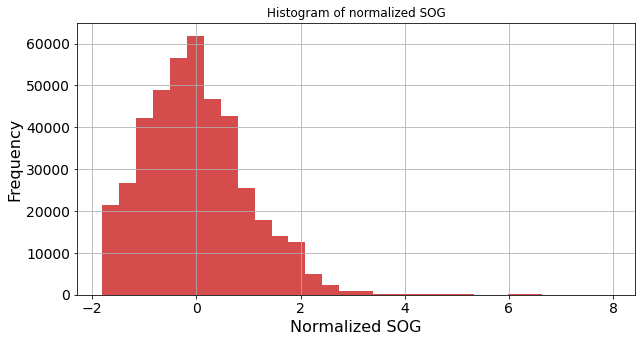

In [23]:
# Normalize SOG
study_data['SOG_norm'] = (study_data['SOG'] - study_data['SOG'].mean(axis = 0)) / study_data['SOG'].std(axis = 0)

# Make histogram of normalized SOG
study_data['SOG_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized SOG', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized SOG', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Remove SOG outliers
study_data = study_data[(study_data['SOG_norm'] < 4)].dropna()

# Standardize to 0 to 1
study_data['SOG_norm'] = ((study_data['SOG_norm'] - study_data['SOG_norm'].min(axis=0)) / 
                           (study_data['SOG_norm'].max(axis = 0) - study_data['SOG_norm'].min(axis=0)))

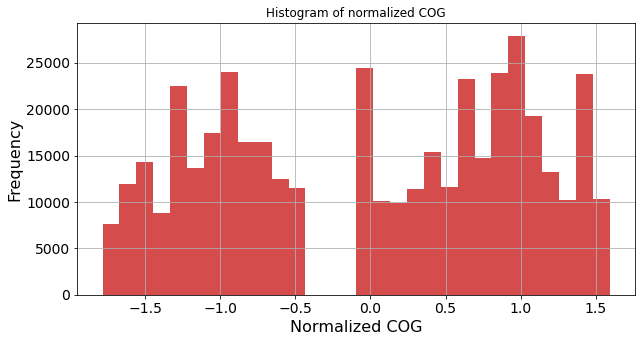

In [24]:
# Normalize COG
study_data['COG_norm'] = (study_data['COG'] - study_data['COG'].mean(axis = 0)) / study_data['COG'].std(axis = 0)

# Make histogram of normalized COG
study_data['COG_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized COG', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized COG', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['COG_norm'] = ((study_data['COG_norm'] - study_data['COG_norm'].min(axis=0)) / 
                           (study_data['COG_norm'].max(axis = 0) - study_data['COG_norm'].min(axis=0)))

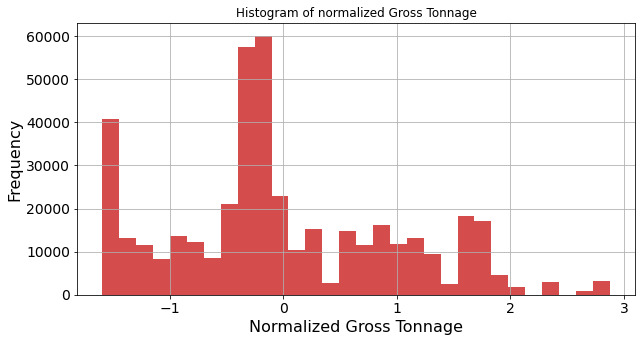

In [25]:
# Normalize Gross Tonnage
study_data['GrossTonnage_norm'] = (study_data['GrossTonnage'] - study_data['GrossTonnage'].mean(axis = 0)) / study_data['GrossTonnage'].std(axis = 0)

# Make histogram of normalized Gross Tonnage
study_data['GrossTonnage_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized Gross Tonnage', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized Gross Tonnage', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['GrossTonnage_norm'] = ((study_data['GrossTonnage_norm'] - study_data['GrossTonnage_norm'].min(axis=0)) / 
                                    (study_data['GrossTonnage_norm'].max(axis = 0) - study_data['GrossTonnage_norm'].min(axis=0)))

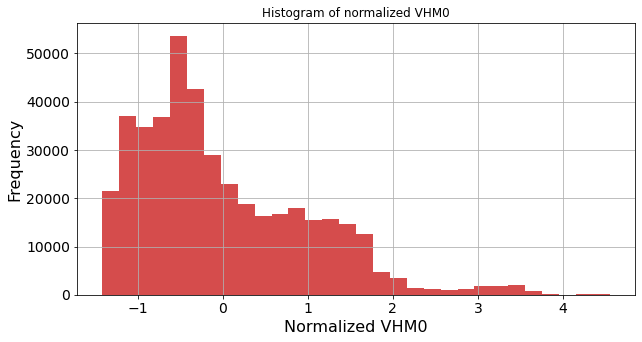

In [26]:
# Normalize VHM0
study_data['VHM0_norm'] = (study_data['VHM0'] - study_data['VHM0'].mean(axis = 0)) / study_data['VHM0'].std(axis = 0)

# Make histogram of normalized VHM0
study_data['VHM0_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized VHM0', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized VHM0', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Remove VHM0 outliers
study_data = study_data[(study_data['VHM0_norm'] > -2)].dropna()

# Standardize to 0 to 1
study_data['VHM0_norm'] = ((study_data['VHM0_norm'] - study_data['VHM0_norm'].min(axis=0)) / 
                            (study_data['VHM0_norm'].max(axis = 0) - study_data['VHM0_norm'].min(axis=0)))

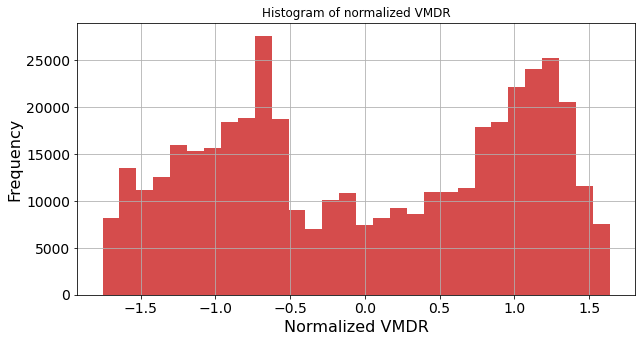

In [27]:
# Normalize VMDR
study_data['VMDR_norm'] = (study_data['VMDR'] - study_data['VMDR'].mean(axis = 0)) / study_data['VMDR'].std(axis = 0)

# Make histogram of normalized VMDR
study_data['VMDR_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized VMDR', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized VMDR', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['VMDR_norm'] = ((study_data['VMDR_norm'] - study_data['VMDR_norm'].min(axis=0)) / 
                            (study_data['VMDR_norm'].max(axis = 0) - study_data['VMDR_norm'].min(axis=0)))

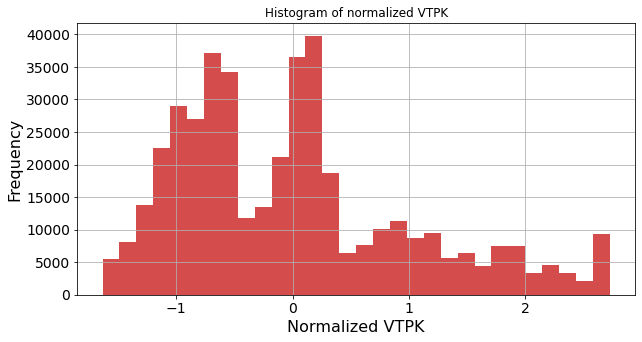

In [28]:
# Normalize VTPK
study_data['VTPK_norm'] = (study_data['VTPK'] - study_data['VTPK'].mean(axis = 0)) / study_data['VTPK'].std(axis = 0)

# Make histogram of normalized VTPK
study_data['VTPK_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized VTPK', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized VTPK', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['VTPK_norm'] = ((study_data['VTPK_norm'] - study_data['VTPK_norm'].min(axis=0)) / 
                            (study_data['VTPK_norm'].max(axis=0) - study_data['VTPK_norm'].min(axis=0)))

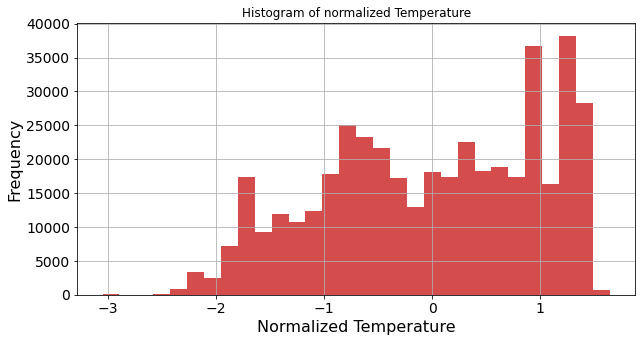

In [29]:
# Normalize Temperature
study_data['Temperature_norm'] = (study_data['Temperature'] - study_data['Temperature'].mean(axis = 0)) / study_data['Temperature'].std(axis = 0)

# Make histogram of normalized Temperature
study_data['Temperature_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized Temperature', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized Temperature', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['Temperature_norm'] = ((study_data['Temperature_norm'] - study_data['Temperature_norm'].min(axis=0)) / 
                                   (study_data['Temperature_norm'].max(axis = 0) - study_data['Temperature_norm'].min(axis=0)))

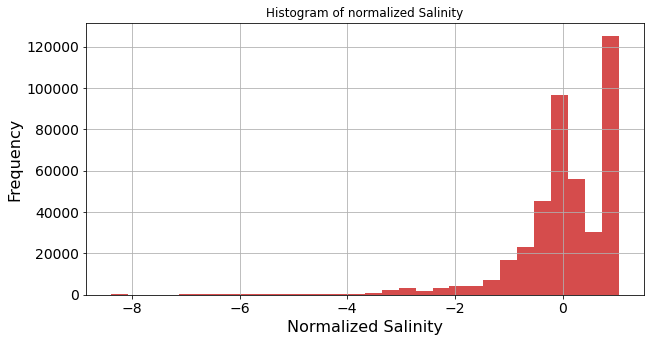

In [30]:
# Normalize Salinity
study_data['Salinity_norm'] = (study_data['Salinity'] - study_data['Salinity'].mean(axis = 0)) / study_data['Salinity'].std(axis = 0)

# Make histogram of normalized Salinity
study_data['Salinity_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized Salinity', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized Salinity', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['Salinity_norm'] = ((study_data['Salinity_norm'] - study_data['Salinity_norm'].min(axis=0)) / 
                               (study_data['Salinity_norm'].max(axis=0) - study_data['Salinity_norm'].min(axis=0)))

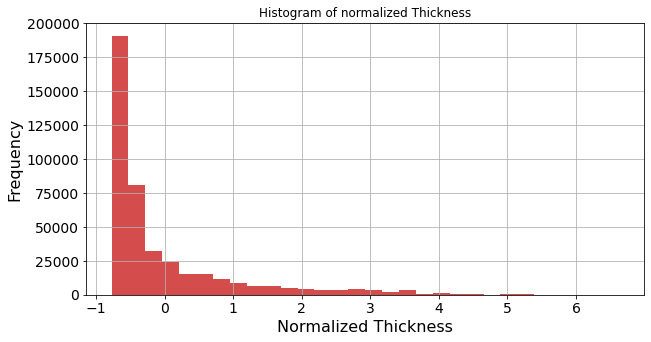

In [31]:
# Normalize Thickness
study_data['Thickness_norm'] = (study_data['Thickness'] - study_data['Thickness'].mean(axis = 0)) / study_data['Thickness'].std(axis = 0)

# Make histogram of normalized Thickness
study_data['Thickness_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized Thickness', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized Thickness', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['Thickness_norm'] = ((study_data['Thickness_norm'] - study_data['Thickness_norm'].min(axis=0)) / 
                               (study_data['Thickness_norm'].max(axis=0) - study_data['Thickness_norm'].min(axis=0)))

In [32]:
print("After preprocessing...")
final_data = study_data.filter(['EstimatedTime', 'LAT', 'LON', 'Heading', 'SOG_norm', 'COG_norm', 'GrossTonnage_norm', 'VHM0_norm', 'VMDR_norm', 'VTPK_norm', 'Temperature_norm', 'Salinity_norm', 'Thickness_norm'])
final_data = final_data.dropna()
final_data.to_csv('data/preprocessed_data.csv')
final_data

After preprocessing...


,EstimatedTime,LAT,LON,Heading,SOG_norm,COG_norm,GrossTonnage_norm,VHM0_norm,VMDR_norm,VTPK_norm,Temperature_norm,Salinity_norm,Thickness_norm
0,2020-01-01 00:00:00,36.80096,-75.22302,283.0,0.313187,0.185836,0.360360,0.215625,0.278556,0.401644,0.375870,0.887591,0.027335
1,2020-01-01 00:00:00,26.08420,-79.48273,187.0,0.335165,0.961661,0.515015,0.087500,0.052832,0.129943,0.835220,0.982673,0.384966
2,2020-01-01 00:00:00,29.34368,-94.74366,86.0,0.170330,0.709402,0.293093,0.017188,0.323412,0.259887,0.490509,0.792078,0.017084
3,2020-01-01 00:00:00,37.76973,-122.35415,326.0,0.192308,0.286447,0.293093,0.082812,0.745706,0.544427,0.377345,0.641309,0.021640
4,2020-01-01 00:00:00,26.89363,-79.20262,155.0,0.692308,0.878388,0.451652,0.090625,0.022122,0.154597,0.808156,0.987242,0.203872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427648,2020-07-02 00:00:00,34.66032,-75.37870,51.0,0.686813,0.611966,0.702102,0.154688,0.286977,0.404725,0.903021,0.974355,0.028474
427649,2020-07-02 00:00:00,37.95802,-123.86718,157.0,0.258242,0.886203,0.304304,0.603125,0.903591,0.409348,0.439025,0.893841,0.070615
427650,2020-07-02 00:00:00,54.39323,-168.56307,269.0,0.186813,0.159219,0.366767,0.306250,0.567006,0.318952,0.294350,0.865739,0.031891
427651,2020-07-02 00:00:00,34.09201,-76.39261,227.0,0.384615,0.052503,0.293093,0.151562,0.304235,0.401130,0.883533,0.964355,0.028474
